# Final Coursework
CM3015 Machine learning and neural networks <br>
Done by: <br>
Cheng Jingling

For this coursework, with reference to the universal workflow shown in Deep Learning with Python 4.5 (1st Edition), I will be building a machine learning model on the IMDB dataset from Keras.

## Defining the problem
#### IMDB dataset
The IMDB dataset from Keras comprises 50,000 reviews sourced from the Internet Movie Database. These reviews are highly polarized, meaning they express strong opinions, and are evenly split between positive and negative sentiment. The dataset is divided into two equal parts for training and testing, each containing 25,000 reviews.
#### What will the input data be?
The input data consists of movie reviews accompanied by sentiment annotations. Each review is represented as a list of integers, with each integer corresponding to a specific word in a predefined dictionary. The sentiment annotations are binary, where 0 represents a negative sentiment and 1 represents a positive sentiment.
#### What am I trying to predict?
The objective is to develop a model capable of accurately predicting the sentiment annotations of movie reviews. Given a set of reviews, the model should classify each review as either positive or negative as accurately as possible.
#### What type of problem am I facing?
This problem falls under binary classification, as the task involves categorizing sentiment annotations into two distinct classes: negative and positive.
## Choosing a measure of success
#### Accuracy
Generally, when classes are balanced - equal proportion of instances - and when we are dealing with classes that require accurate prediction of both positive and negative results, accuracy is the preferred measure of success. 

Additionally, we are dealing with a binary classification task where each category is mutually exclusive. Hence, in the case of the IMDB dataset where we are dealing with predicting positive or negative reviews, accuracy serves as a suitable measure of success.
## Deciding on an evaluation protocol
#### Maintaining a hold-out validation set
Given the substantial amount of training data available (25,000 reviews), employing a hold-out validation set is deemed adequate for evaluating model performance. This approach involves partitioning a portion of the training data to serve as a validation set, which allows for monitoring the model's performance during training without compromising the test set's integrity. The model's accuracy on the validation set serves as an indicator of its generalization capability.
## Loading the IMDB dataset
The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.
The following code will load the dataset.

In [4]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means I will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows me to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for `negative` and 1 stands for `positive`:

In [55]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [56]:
train_labels[0]

1

As mentioned earlier, as we are restricting the training data to the top 10,000 most frequent words, no word index will exceed 10,000:

In [21]:
max([max(sequence) for sequence in train_data]) # shows max word index

9999

For example, here is how I can quickly decode one of these reviews back to English words:

In [58]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 1s 1us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data
#### Vectorizing data and labels
To feed the lists of integers into a neural network, I have to turn the list into tensors. To do that, I will one-hot encode my lists to turn them into vectors of 0s and 1s. For instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then I can use it in the first layer of my network as a Dense layer, capable of handling floating-point vector data. I will do this manually for maximum clarity.

In [5]:
import numpy as np

# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
        
    return results

# Vectorize data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Here is what the samples look like now:

In [59]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Setting aside a validation set
In order to monitor during training the accuracy of the model on data it has never seen before, I will create a validation set by setting apart 10,000 samples from the original training data.

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Developing a baseline model
Our first step would be to build a baseline model as a reference point for evaluating the performance of our other models. To create a random baseline, I will shuffle a copy of the test labels and compare it to the original test labels. I will then calculate the number of correct predictions out of the total number of predictions to get the accuracy.

In [3]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.49976

## Developing a model that does better than the baseline
The goal at this stage is to achieve statistical power: that is, to develop a small model that is capable of beating a dumb baseline. For the IMDB dataset, anything that achieves an accuracy greater than 0.5 can be said to have statistical power.

For this model, I will be implementing the following architecture:
- Two intermediate layers with 16 hidden units each
- A third layer that will output the scalar prediction regarding the sentiment of the current review

The intermediate layers will use `relu` as their activation function, and the final layer will use a `sigmoid` activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be positive). A `relu` (rectified linear unit) is a function meant to zero out negative values, whereas a `sigmoid` “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability.

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Because I am facing a binary classification problem and the output of my model is a probability (I end my model with a single-unit layer with a `sigmoid` activation), it is best to use the `binary_crossentropy` loss.

Here is the step where I configure the model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Additionally, the model's performance will be evaluated using the `accuracy` metric.

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

I will now train the model for 20 epochs (20 iterations over all samples in the `partial_x_train` and `partial_y_train` tensors), in mini-batches of 512 samples. At the same time, I will monitor loss and accuracy on the 10,000 samples that I set aside in `x_val` and `y_val`.

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5113 - accuracy: 0.7654 - val_loss: 0.3794 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3023 - accuracy: 0.9014 - val_loss: 0.3042 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2191 - accuracy: 0.9299 - val_loss: 0.2815 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9456 - val_loss: 0.2773 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1435 - accuracy: 0.9537 - val_loss: 0.2861 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.9660 - val_loss: 0.2963 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 0.9731 - val_loss: 0.3217 - val_accuracy: 0.8787
Epoch 8/20
30/30 [=

The call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training.

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The dictionary contains four entries: one per metric that was being monitored during training and during validation. Let’s use Matplotlib to plot the training and validation loss, as well as the training and validation accuracy.

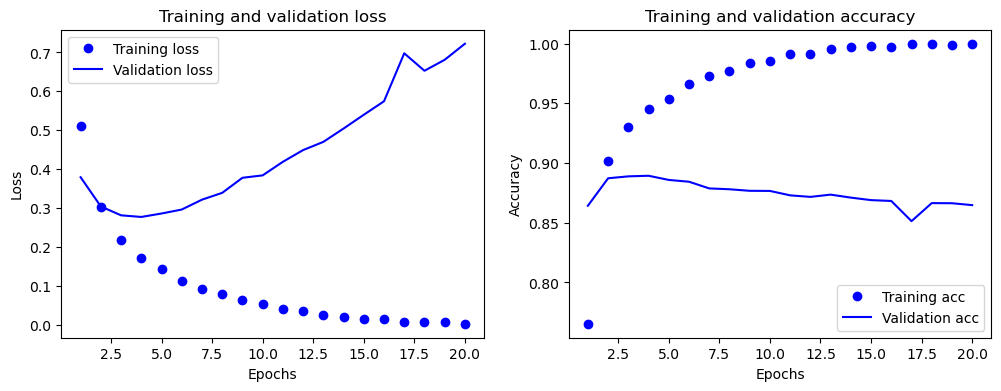

In [19]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As we can see, the validation accuracy peaks at the fourth epoch. Assuming we stop training after four epochs, this model would achieve an accuracy of 88.93% on the validation data.
## Scaling up: developing a model that overfits
Once we have obtained a model that has statistical power, the next step is to work towards universal tension - a model that stands right at the border between optimization and generalization.

To achieve overfitting, let's build a model with a much higher capacity:

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5384 - accuracy: 0.7499 - val_loss: 0.2927 - val_accuracy: 0.8829
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2830 - accuracy: 0.8916 - val_loss: 0.2712 - val_accuracy: 0.8896
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1620 - accuracy: 0.9379 - val_loss: 0.2974 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0771 - accuracy: 0.9735 - val_loss: 0.4909 - val_accuracy: 0.8119
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0174 - accuracy: 0.9961 - val_loss: 0.5066 - val_accuracy: 0.8780
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1840 - accuracy: 0.9765 - val_loss: 0.3703 - val_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4930 - val_accuracy: 0.8889
Epoch 8/20
30

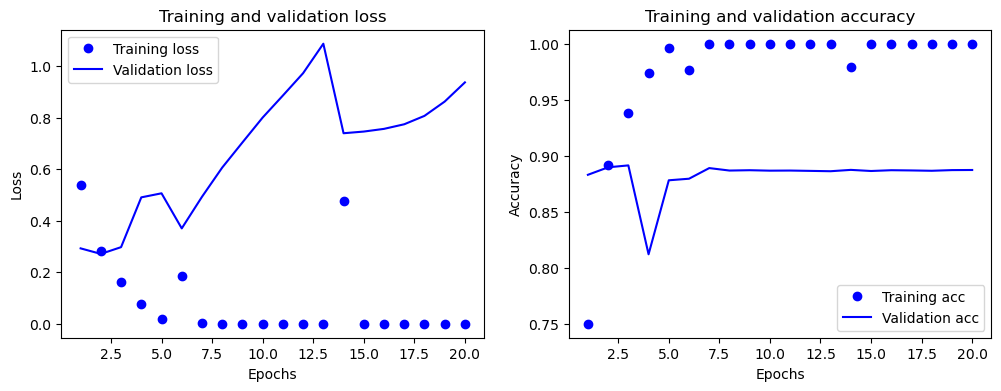

In [22]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The higher-capacity model starts overfitting almost immediately, after just one epoch, and it overfits much more severely.

However, the higher-capacity model gets its training loss near zero very quickly. The more capacity the model has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

Assuming we stop training after three epochs, the higher-capacity model would achieve an accuracy of 89.13% on the validation data.
## Regularizing the model - reducing capacity
Now let's try regularizing the model to reduce overfitting. One way to do so is by reducing the capacity of the model.

Epoch 1/20
30/30 [==============================] - 0s 9ms/step - loss: 0.6149 - accuracy: 0.7223 - val_loss: 0.5494 - val_accuracy: 0.8215
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.8653 - val_loss: 0.4615 - val_accuracy: 0.8505
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8943 - val_loss: 0.3977 - val_accuracy: 0.8620
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.9113 - val_loss: 0.3473 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.9227 - val_loss: 0.3147 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9315 - val_loss: 0.2943 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9383 - val_loss: 0.2845 - val_accuracy: 0.8897
Epoch 8/20
30/30 [==

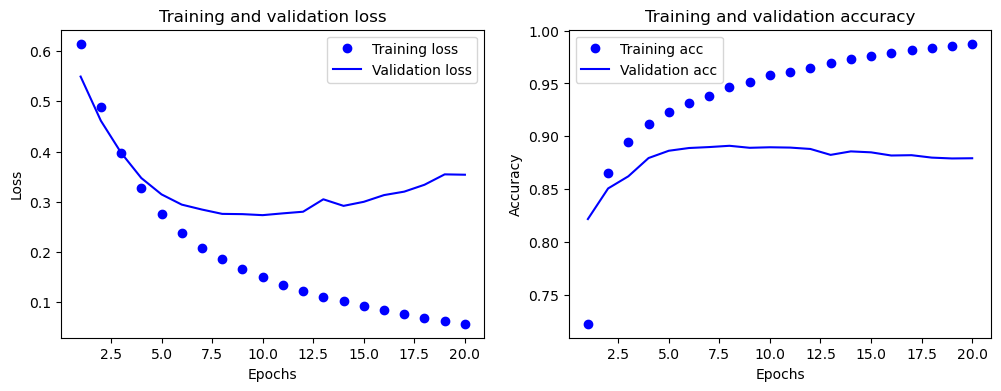

In [26]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The lower-capacity model starts overfitting later than the higher-capacity model (after eight epochs rather than one), and its performance degrades more slowly once it starts overfitting.

Assuming we stop training after eight epochs, the lower-capacity model would achieve an accuracy of 89.09% on the validation data.
## Regularizing the model - adding weight regularization
Another way to reduce overfitting is to add weight regularization to the model. This means to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
- L1 regularization — The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
- L2 regularization — The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights).

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.
### L1 regularization

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 17.6364 - accuracy: 0.6178 - val_loss: 5.8629 - val_accuracy: 0.6545
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 4.4076 - accuracy: 0.7555 - val_loss: 3.3825 - val_accuracy: 0.8329
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 3.2614 - accuracy: 0.8337 - val_loss: 3.2210 - val_accuracy: 0.8421
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 3.1921 - accuracy: 0.8485 - val_loss: 3.1679 - val_accuracy: 0.8611
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 3.1586 - accuracy: 0.8648 - val_loss: 3.2814 - val_accuracy: 0.7880
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 3.1378 - accuracy: 0.8693 - val_loss: 3.1279 - val_accuracy: 0.8730
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 3.1166 - accuracy: 0.8800 - val_loss: 3.1420 - val_accuracy: 0.8638
Epoch 8/20
3

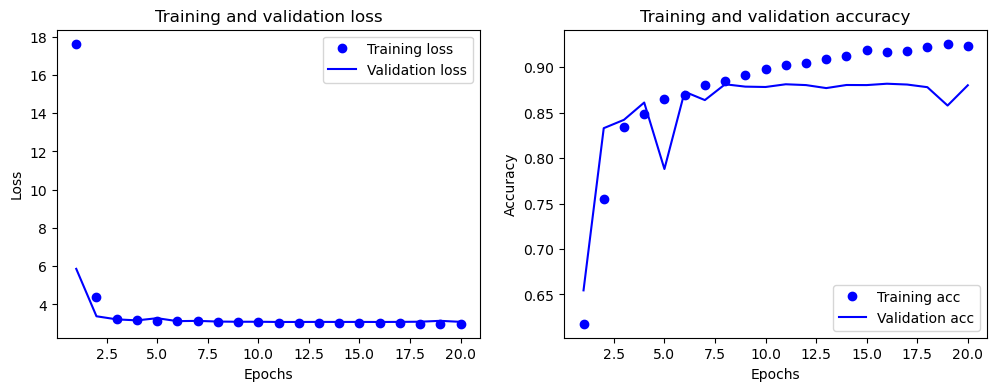

In [28]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Adding L1 regularization to the overfitting model (higher-capacity model) resulted in a fairly low validation loss. However, the validation accuracy suffered a significant drop in the fifth epoch.

Assuming we stop training after four epochs, the L1 regularization model would achieve an accuracy of 86.11% on the validation data.
### L2 regularization

Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 1.2627 - accuracy: 0.7659 - val_loss: 1.1075 - val_accuracy: 0.6733
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6209 - accuracy: 0.8747 - val_loss: 0.5685 - val_accuracy: 0.8647
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4589 - accuracy: 0.8991 - val_loss: 0.4594 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3837 - accuracy: 0.9123 - val_loss: 0.4389 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3457 - accuracy: 0.9204 - val_loss: 0.4237 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2979 - accuracy: 0.9375 - val_loss: 0.4146 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2744 - accuracy: 0.9397 - val_loss: 0.4053 - val_accuracy: 0.8824
Epoch 8/20
30

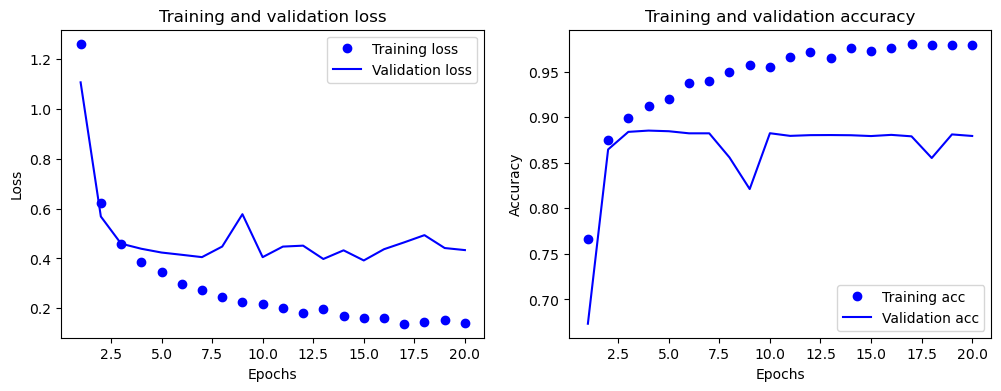

In [29]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Adding L2 regularization to the overfitting model (higher-capacity model) resulted in a higher validation loss than the L1 regularization model. The validation accuracy also started to fall after the fourth epoch.

Assuming we stop training after four epochs, the L2 regularization model would achieve an accuracy of 88.54% on the validation data.

We can see that with L2 regularization, the maximum accuracy it can attain on validation data is slightly better than with L1 regularization.
### Simultaneous L1 and L2 regularization

Now, let us consider using both L1 and L2 regularization.

Epoch 1/20
30/30 [==============================] - 1s 41ms/step - loss: 18.0000 - accuracy: 0.5941 - val_loss: 5.9209 - val_accuracy: 0.6980
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 4.4581 - accuracy: 0.7598 - val_loss: 3.3870 - val_accuracy: 0.8367
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 3.2694 - accuracy: 0.8279 - val_loss: 3.2087 - val_accuracy: 0.8472
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 3.1979 - accuracy: 0.8528 - val_loss: 3.1732 - val_accuracy: 0.8628
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 3.1807 - accuracy: 0.8601 - val_loss: 3.1732 - val_accuracy: 0.8564
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 3.1617 - accuracy: 0.8687 - val_loss: 3.1711 - val_accuracy: 0.8550
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 3.1373 - accuracy: 0.8782 - val_loss: 3.1372 - val_accuracy: 0.8752
Epoch 8/20
3

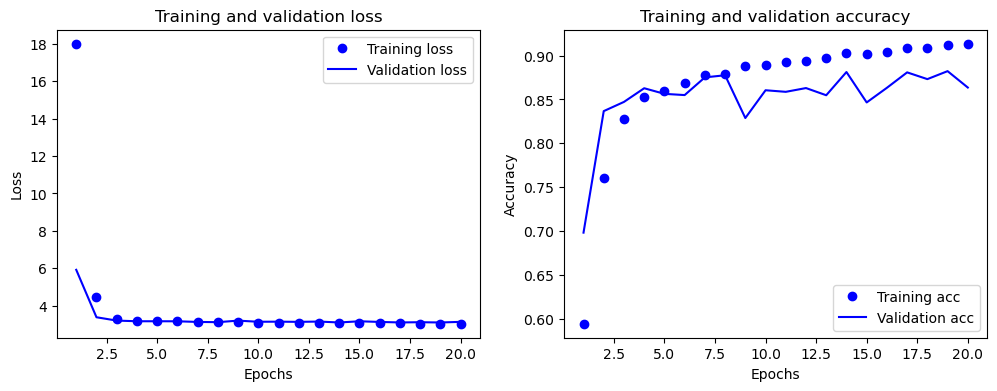

In [30]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Similar to the L1 regularization model, adding simultaneous L1 and L2 regularization to the overfitting model (higher-capacity model) resulted in a fairly low validation loss. However, the validation accuracy also started to fall after the fourth epoch.

Assuming we stop training after four epochs, the L1+L2 regularization model would achieve an accuracy of 86.28% on the validation data.

Previously, we saw that L2 regularization performed better than L1 regularization. However, using both L1 and L2, it performs slightly better than L1 but worse than L2 on the validation data.
## Regularizing the model - adding dropout
Now, let us consider another method to counter overfitting models.

Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. The dropout rate is the fraction of the features that are zeroed out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

In Keras, dropout is introduced via the Dropout layer, which is applied to the output of the layer right before it.

Let’s add two Dropout layers with dropout rate 0.5 to see how well they do at reducing overfitting.

Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5674 - accuracy: 0.7401 - val_loss: 0.3261 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2872 - accuracy: 0.8883 - val_loss: 0.2693 - val_accuracy: 0.8933
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2182 - accuracy: 0.9156 - val_loss: 0.2695 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1281 - accuracy: 0.9528 - val_loss: 0.4325 - val_accuracy: 0.8643
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1088 - accuracy: 0.9598 - val_loss: 0.3520 - val_accuracy: 0.8909
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0904 - accuracy: 0.9728 - val_loss: 0.3517 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.5579 - val_accuracy: 0.8779
Epoch 8/20
30

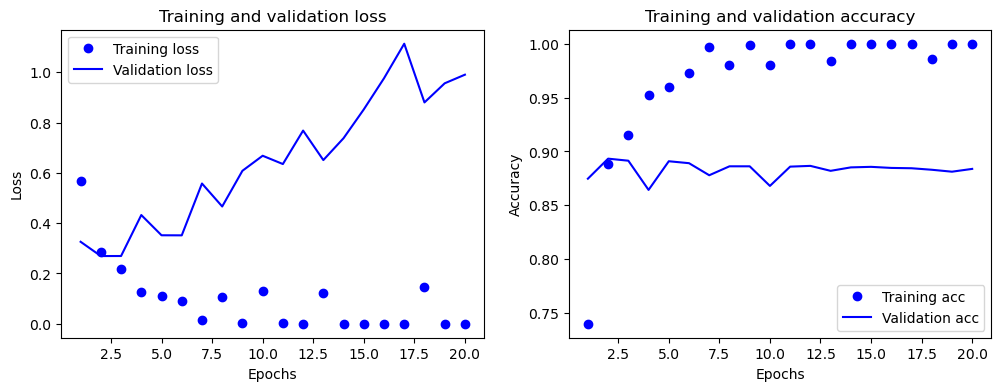

In [31]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

loss_epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_epochs, loss, 'bo', label='Training loss')
plt.plot(loss_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

acc_epochs = range(1, len(acc) + 1)

plt.subplot(1, 2, 2)
plt.plot(acc_epochs, acc, 'bo', label='Training acc')
plt.plot(acc_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Adding dropout to the overfitting model (high-capacity model) resulted in the highest accuracy amongst all models when training with just two epochs.

Assuming we stop training after two epochs, the dropout model would achieve an accuracy of 89.33% on the validation data.
## Summary of results
Here is a summary of the results from the different models:

| Model | Validation accuracy | No. of epochs |
| --- | --- | --- |
| Baseline model | 49.97% | - |
| Better than baseline model | 88.95% | 3 |
| Overfitting model (higher capacity) | 89.13% | 3 |
| Regularization model 1 (lower capacity) | 89.09% | 8 |
| Regularization model 2 (L1 regularization) | 86.11% | 4 |
| Regulatization model 3 (L2 regularization) | 88.54% | 4 |
| Regularization model 4 (L1 and L2 regularization) | 86.28% | 4 |
| Regularization model 5 (dropout) | 89.33% | 2 |

Based on the results above, the model with the highest accuracy on validation data is regularization model 5 (overfitting model with dropout) with 89.33% accuracy trained over 2 epochs.
## Retraining the best model on all the training data
Now let's retrain the best model on all the training data and evaluate it on the test data.

In [20]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=2,
          batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/2
49/49 [==============================] - 1s 24ms/step - loss: 0.4721 - accuracy: 0.7808
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3116 - accuracy: 0.8734


[0.31158170104026794, 0.8734400272369385]

On the test data, our final model has achieved an accuracy of 87.34%.

## Conclusion

In this report we have looked into using a systematic approach to training machine learning models for sentiment analysis on the IMDB dataset. I did this with reference to the universal workflow specified in Deep Learning with Python. I analyzed the dataset and defined the problem to be a binary classification. From there, I derived accuracy to be a suitable measure of success to be used to evaluate the different iterations of the model.

Then, I created a baseline model as a reference point for evaluating the performance of the other models I will be building. I first started off by building a model that performs better than the baseline to achieve statistical power. From there I achieved an accuracy of 88.95%. With this model, I tried to overfit it by increasing the model's capacity so I can find a balance between an optimized and generalized model.

To counter the issue of overfitting, I employed methods such as lowering model capacity, adding weight regularization and adding dropout. Through experimentation, I observed the impact of model complexity and regularization on both training and validation performance. Notably, I found that while increasing model capacity can lead to overfitting, appropriate regularization techniques such as dropout and weight regularization can mitigate this issue, improving generalization performance. Through these methods, I was able to fine-tune the model to maximize generalized performance.

Finally, my best-performing model, incorporating dropout regularization, achieved an accuracy of 89.33% on the validation data and 87.34% on the test data.